In [1]:
def retirement_n(current_balance, annual_salary, annual_cap, n, contrib,
                 annual_salary_increase, employer_match, match_cap, rate):
    '''
    return :: retirement amount at year n
    '''
    
    annual_salary_n = annual_salary*(1+annual_salary_increase)**n
    
    your_contrib = contrib*annual_salary_n
    your_contrib = min(your_contrib, annual_cap)
    employer_contrib = contrib*annual_salary_n*employer_match
    employer_contrib = min(employer_contrib, match_cap*annual_salary_n*employer_match)
    
    contrib_total = your_contrib + employer_contrib
    
    return your_contrib, employer_contrib, current_balance + contrib_total*(1+rate)**n



def retirement_total(current_balance, annual_salary, annual_cap=18000, contrib=0.05, 
                annual_salary_increase=0.02, employer_match=0.5, match_cap=0.06, rate=0.03,
                current_age=35, plan_years=35, life_expectancy=80, fees=0, per_month=False):
    
    
    i = 0
    result = 0
    contrib_list = []; ematch_list = []; total_list = []
    
    while i <= plan_years:
        cn = retirement_n(current_balance=current_balance, annual_salary=annual_salary, 
                          annual_cap=annual_cap, n=i, 
                          contrib=contrib, match_cap=match_cap, 
                          annual_salary_increase=annual_salary_increase,
                          employer_match=employer_match, rate=rate)
        
        contrib_list.append(cn[0])
        ematch_list.append(cn[1])        
        total_list.append(cn[2])
        
        result = result + cn[2]
        i+=1
        
    result = result - fees
    
    years_payback = life_expectancy - (current_age + plan_years)
     
    if per_month:
        months = 12
    else:
        months = 1
    result = result / (years_payback*months)
    print('You get back:',result)
    
    
    return result, contrib_list, ematch_list, total_list

In [2]:
result, contrib, ematch, total = retirement_total(current_balance=1000, plan_years=35,
                                                  current_age=36,
                                                  annual_salary=40000, per_month=True)


In [3]:
from matplotlib import pyplot as plt

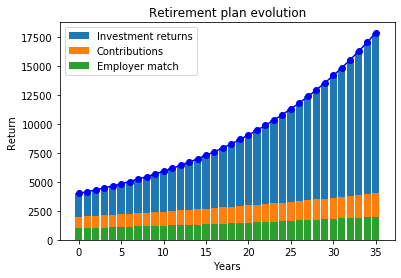

In [4]:
years = [i for i in range(len(total))]
plt.plot(years, total,'-o',color='b')

width=0.85
p1 = plt.bar(years, total, width=width)
p2 = plt.bar(years, contrib, width=width)
p3 = plt.bar(years, ematch, width=width)

plt.xlabel('Years')
plt.ylabel('Return')
plt.title('Retirement plan evolution')

plt.legend((p1[0], p2[0], p3[0]), ('Investment returns','Contributions','Employer match'))
plt.show()